## По согласованию (договоренности) с Алексеем Владимировичем сдается недоделанная ЛР
### По договоренности итоговая версия будет готова 3 июня
# GITHUB : https://github.com/SuvorovNM/IntroML_Lab3

# Получение данных из train.csv

In [97]:
import math
import random
import os
import json
import statistics

import numpy as np
import ast
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import seaborn as sns
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

## Преобразование данных

In [98]:
group_columns = ['device', 'geoNetwork', 'totals', 'trafficSource']
# fullvisitorId - должно быть только string, так как при чтении в float может округлиться
df = pd.read_csv('train.csv', 
                     converters={col: json.loads for col in group_columns}, 
                     dtype={'fullVisitorId': 'str'}, low_memory=False)
# Берем случайные 10% выборки
df = df.sample(frac=0.1).reset_index(drop=True)
    
for col in group_columns:
    # Нормализация каждого сгруппированного столбца
    normalizedColumn = pd.json_normalize(df[col])
    # Именование каждого столбца
    normalizedColumn.columns = [f"{col}.{parameter}" for parameter in normalizedColumn.columns]
    # Удаление сгрупиированного столбца и добавление новых столбцов к DF
    df = df.drop(col, axis=1)#.merge(normalizedColumn, right_index=True, left_index=True)
    df = df.merge(normalizedColumn, right_index=True, left_index=True)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   channelGrouping                                    90365 non-null  object
 1   date                                               90365 non-null  int64 
 2   fullVisitorId                                      90365 non-null  object
 3   sessionId                                          90365 non-null  object
 4   socialEngagementType                               90365 non-null  object
 5   visitId                                            90365 non-null  int64 
 6   visitNumber                                        90365 non-null  int64 
 7   visitStartTime                                     90365 non-null  int64 
 8   device.browser                                     90365 non-null  object
 9   device.browserVer

### Transaction -> float (похоже, можно было и в int)

In [100]:
df['totals.transactionRevenue'] = df['totals.transactionRevenue'].astype(float)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   channelGrouping                                    90365 non-null  object 
 1   date                                               90365 non-null  int64  
 2   fullVisitorId                                      90365 non-null  object 
 3   sessionId                                          90365 non-null  object 
 4   socialEngagementType                               90365 non-null  object 
 5   visitId                                            90365 non-null  int64  
 6   visitNumber                                        90365 non-null  int64  
 7   visitStartTime                                     90365 non-null  int64  
 8   device.browser                                     90365 non-null  object 
 9   device

### Удаление ненужных столбцов: либо недоступных, либо тех которые описывают информацию, уже описывающуюся другими столбцами

In [102]:
df = df.drop('sessionId', 1)

In [103]:
df = df.drop('visitId', 1)

In [104]:
df = df.drop('visitStartTime', 1)

In [105]:
df = df.drop('device.browserVersion', 1)

In [106]:
df = df.drop('device.browserSize', 1)

In [107]:
df = df.drop('device.operatingSystemVersion', 1)

In [108]:
df = df.drop('device.mobileDeviceBranding', 1)

In [109]:
df = df.drop('device.mobileDeviceModel', 1)

In [110]:
df = df.drop('device.mobileInputSelector', 1)

In [111]:
df = df.drop('device.mobileDeviceInfo', 1)

In [112]:
df = df.drop('device.mobileDeviceMarketingName', 1)

In [113]:
df = df.drop('device.flashVersion', 1)

In [114]:
df = df.drop('device.language', 1)

In [115]:
df = df.drop('device.screenColors', 1)

In [116]:
df = df.drop('device.screenResolution', 1)

In [117]:
df = df.drop('geoNetwork.country', 1)

In [118]:
df = df.drop('geoNetwork.region', 1)

In [119]:
df = df.drop('geoNetwork.metro', 1)

In [120]:
df = df.drop('geoNetwork.city', 1)

In [121]:
df = df.drop('geoNetwork.cityId', 1)

In [122]:
df = df.drop('geoNetwork.latitude', 1)

In [123]:
df = df.drop('geoNetwork.longitude', 1)

In [124]:
df = df.drop('geoNetwork.networkLocation', 1)

In [125]:
df = df.drop('totals.visits', 1)

In [126]:
df = df.drop('trafficSource.referralPath', 1)

In [127]:
df = df.drop('trafficSource.adwordsClickInfo.criteriaParameters', 1)

In [128]:
#df = df.drop('trafficSource.campaignCode', 1)

In [129]:
df = df.drop('geoNetwork.subContinent', 1)

In [130]:
df = df.drop('geoNetwork.networkDomain', 1)

In [131]:
df = df.drop('trafficSource.campaign', 1)

In [132]:
df = df.drop('trafficSource.medium', 1)

In [133]:
df = df.drop('trafficSource.keyword', 1)

In [134]:
df = df.drop('trafficSource.isTrueDirect', 1)

In [135]:
df = df.drop('trafficSource.adwordsClickInfo.page', 1)

In [136]:
df = df.drop('trafficSource.adwordsClickInfo.slot', 1)

In [137]:
df = df.drop('trafficSource.adwordsClickInfo.gclId', 1)

In [138]:
df = df.drop('trafficSource.adwordsClickInfo.isVideoAd', 1)

In [139]:
df = df.drop('trafficSource.adContent', 1)

In [140]:
df = df.drop('device.isMobile', 1)

In [141]:
df = df.drop('trafficSource.source', 1)

In [142]:
df = df.drop('socialEngagementType', 1)

In [143]:
df.iloc[0]

channelGrouping                                      Organic Search
date                                                       20170406
fullVisitorId                                   8456367562440240862
visitNumber                                                       1
device.browser                                               Chrome
device.operatingSystem                                    Macintosh
device.deviceCategory                                       desktop
geoNetwork.continent                                        Oceania
totals.hits                                                       9
totals.pageviews                                                  5
totals.newVisits                                                  1
totals.bounces                                                  NaN
totals.transactionRevenue                                       NaN
trafficSource.adwordsClickInfo.adNetworkType                    NaN
Name: 0, dtype: object

### date -> Datetime - приводим параметр в строку, строку разбиваем на YYYYMMDD, по которым создаем datetime

In [144]:
from datetime import datetime, timedelta
for i in range(len(df['date'])):
    dateString = str(df.loc[i, 'date'])
    df.loc[i, 'date'] = datetime(year=int(dateString[0:4]), month=int(dateString[4:6]), day=int(dateString[6:8]))
df['date'] = pd.to_datetime(df['date'])

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   channelGrouping                               90365 non-null  object        
 1   date                                          90365 non-null  datetime64[ns]
 2   fullVisitorId                                 90365 non-null  object        
 3   visitNumber                                   90365 non-null  int64         
 4   device.browser                                90365 non-null  object        
 5   device.operatingSystem                        90365 non-null  object        
 6   device.deviceCategory                         90365 non-null  object        
 7   geoNetwork.continent                          90365 non-null  object        
 8   totals.hits                                   90365 non-null  obje

### channelGrouping -> float в зависимости от транзакций для каждого типа
### используется аналог "счетчика" для обработки категориальных признаков для задач классификации
### Для каждой группы считается логарифм от суммы транзакций, после чего это число
### для каждой группы делится на количество элементов в группе

In [146]:
df['totals.transactionRevenue'].value_counts()

44790000.0    23
18990000.0    22
16990000.0    20
13590000.0    18
33590000.0    17
              ..
94690000.0     1
16020000.0     1
94600000.0     1
51160000.0     1
16780000.0     1
Name: totals.transactionRevenue, Length: 816, dtype: int64

In [147]:
df['totals.transactionRevenue'] = df['totals.transactionRevenue'].fillna(0)

In [148]:
df_channel = df.groupby(df['channelGrouping'])

In [149]:
df_channel2 = df_channel.apply(lambda x: math.log(sum(x['totals.transactionRevenue'])+1))

In [150]:
df_channel = df_channel.apply(lambda x: len(x))

In [151]:
df_channel

channelGrouping
(Other)               7
Affiliates         1648
Direct            14130
Display             670
Organic Search    38088
Paid Search        2564
Referral          10520
Social            22738
dtype: int64

In [152]:
df_channel2

channelGrouping
(Other)            0.000000
Affiliates        15.891195
Direct            24.297969
Display           21.636929
Organic Search    24.340225
Paid Search       22.406476
Referral          24.876760
Social            19.652629
dtype: float64

In [153]:
channelGrouping = {
    '(Other)' : df_channel2['(Other)'] / df_channel['(Other)'],
    'Affiliates' : df_channel2['Affiliates'] / df_channel['Affiliates'],
    'Direct' : df_channel2['Direct'] / df_channel['Direct'],
    'Display' : df_channel2['Display'] / df_channel['Display'],
    'Organic Search' : df_channel2['Organic Search'] / df_channel['Organic Search'],
    'Paid Search' : df_channel2['Paid Search'] / df_channel['Paid Search'],
    'Referral' : df_channel2['Referral'] / df_channel['Referral'],
    'Social' : df_channel2['Social'] / df_channel['Social']
}

In [154]:
channelGrouping

{'(Other)': 0.0,
 'Affiliates': 0.009642715519561229,
 'Direct': 0.0017196014725053854,
 'Display': 0.03229392406044676,
 'Organic Search': 0.0006390523383129501,
 'Paid Search': 0.008738875343129837,
 'Referral': 0.002364711001637459,
 'Social': 0.0008643077040923146}

In [155]:
df['channelGrouping'] = df['channelGrouping'].replace(channelGrouping)

In [156]:
df['channelGrouping'].value_counts()

0.000639    38088
0.000864    22738
0.001720    14130
0.002365    10520
0.008739     2564
0.009643     1648
0.032294      670
0.000000        7
Name: channelGrouping, dtype: int64

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   channelGrouping                               90365 non-null  float64       
 1   date                                          90365 non-null  datetime64[ns]
 2   fullVisitorId                                 90365 non-null  object        
 3   visitNumber                                   90365 non-null  int64         
 4   device.browser                                90365 non-null  object        
 5   device.operatingSystem                        90365 non-null  object        
 6   device.deviceCategory                         90365 non-null  object        
 7   geoNetwork.continent                          90365 non-null  object        
 8   totals.hits                                   90365 non-null  obje

### Browser -> dummy variables - создание столбцов со значениями (0/1) для самых популярных браузеров

In [158]:
df['browser.Chrome'] = df['device.browser'] == 'Chrome'
df['browser.Safari'] = df['device.browser'] == 'Safari'
df['browser.Firefox'] = df['device.browser'] == 'Firefox'
df['browser.IE'] = df['device.browser'] == 'Internet Explorer'
df['browser.Edge'] = df['device.browser'] == 'Edge'
df['browser.Other'] = (df['device.browser'] != 'Chrome') & (df['device.browser'] != 'Firefox') & (
    df['device.browser'] != 'Safari') & (df['device.browser'] != 'Internet Explorer') & (df['device.browser'] != 'Edge')

In [159]:
df = df.drop('device.browser', 1)

### OperatingSystem -> dummy variables - создание столбцов со значениями (0/1) для самых популярных ОС

In [160]:
df['device.operatingSystem'].value_counts()

Windows          35063
Macintosh        25206
Android          12331
iOS              10943
Linux             3523
Chrome OS         2630
(not set)          472
Windows Phone      123
Samsung             30
BlackBerry          20
Firefox OS           9
Xbox                 6
Nintendo Wii         4
Nintendo WiiU        3
Nintendo 3DS         1
Nokia                1
Name: device.operatingSystem, dtype: int64

In [161]:
df['OS.Windows'] = df['device.operatingSystem'] == 'Windows'
df['OS.Mac'] = df['device.operatingSystem'] == 'Macintosh'
df['OS.Android'] = df['device.operatingSystem'] == 'Android'
df['OS.IOS'] = df['device.operatingSystem'] == 'iOS'
df['OS.Linux'] = df['device.operatingSystem'] == 'Linux'
df['OS.Other'] = (df['device.operatingSystem'] != 'Windows') & (df['device.operatingSystem'] != 'Macintosh') & (
    df['device.operatingSystem'] != 'Android') & (df['device.operatingSystem'] != 'iOS') & (df['device.operatingSystem'] != 'Linux')

In [162]:
df = df.drop('device.operatingSystem', 1)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   channelGrouping                               90365 non-null  float64       
 1   date                                          90365 non-null  datetime64[ns]
 2   fullVisitorId                                 90365 non-null  object        
 3   visitNumber                                   90365 non-null  int64         
 4   device.deviceCategory                         90365 non-null  object        
 5   geoNetwork.continent                          90365 non-null  object        
 6   totals.hits                                   90365 non-null  object        
 7   totals.pageviews                              90352 non-null  object        
 8   totals.newVisits                              70271 non-null  obje

### DeviceCategory -> category
### Делается предположение, что планшет - что-то среднее между компьютером и смартфоном, из-за чего группировка делается именно так:
### Компьютер - 0
### Планшет - 1
### Смартфон - 2

In [164]:
df['device.deviceCategory'].value_counts()

desktop    66316
mobile     20933
tablet      3116
Name: device.deviceCategory, dtype: int64

In [165]:
deviceCats = {
    'desktop' : 0,
    'tablet' : 1,
    'mobile' : 2
}

In [166]:
df['device.deviceCategory'] = df['device.deviceCategory'].replace(deviceCats)

In [167]:
df['device.deviceCategory'].value_counts()

0    66316
2    20933
1     3116
Name: device.deviceCategory, dtype: int64

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   channelGrouping                               90365 non-null  float64       
 1   date                                          90365 non-null  datetime64[ns]
 2   fullVisitorId                                 90365 non-null  object        
 3   visitNumber                                   90365 non-null  int64         
 4   device.deviceCategory                         90365 non-null  int64         
 5   geoNetwork.continent                          90365 non-null  object        
 6   totals.hits                                   90365 non-null  object        
 7   totals.pageviews                              90352 non-null  object        
 8   totals.newVisits                              70271 non-null  obje

### geoNetwork.continent -> float (подобие "счетчика") - описано выше

In [169]:
df['geoNetwork.continent'].value_counts()

Americas     44952
Asia         22394
Europe       19837
Oceania       1526
Africa        1498
(not set)      158
Name: geoNetwork.continent, dtype: int64

In [170]:
df_region = df.groupby(df['geoNetwork.continent'])

In [171]:
df_region2 = df_region.apply(lambda x: math.log(sum(x['totals.transactionRevenue'])+1))

In [172]:
df_region = df_region.apply(lambda x:len(x))

In [173]:
df_region

geoNetwork.continent
(not set)      158
Africa        1498
Americas     44952
Asia         22394
Europe       19837
Oceania       1526
dtype: int64

In [174]:
df_region2

geoNetwork.continent
(not set)     0.000000
Africa       21.249939
Americas     25.663490
Asia         20.977792
Europe       21.331313
Oceania      18.949543
dtype: float64

In [175]:
regionGrouping = {
    '(not set)' : df_region2['(not set)'] / df_region['(not set)'],
    'Africa' : df_region2['Africa'] / df_region['Africa'],
    'Americas' : df_region2['Americas'] / df_region['Americas'],
    'Asia' : df_region2['Asia'] / df_region['Asia'],
    'Europe' : df_region2['Europe'] / df_region['Europe'],
    'Oceania' : df_region2['Oceania'] / df_region['Oceania'],
}

In [176]:
df['geoNetwork.continent'] = df['geoNetwork.continent'].replace(regionGrouping)

In [177]:
df['geoNetwork.continent'].value_counts()

0.000571    44952
0.000937    22394
0.001075    19837
0.012418     1526
0.014186     1498
0.000000      158
Name: geoNetwork.continent, dtype: int64

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   channelGrouping                               90365 non-null  float64       
 1   date                                          90365 non-null  datetime64[ns]
 2   fullVisitorId                                 90365 non-null  object        
 3   visitNumber                                   90365 non-null  int64         
 4   device.deviceCategory                         90365 non-null  int64         
 5   geoNetwork.continent                          90365 non-null  float64       
 6   totals.hits                                   90365 non-null  object        
 7   totals.pageviews                              90352 non-null  object        
 8   totals.newVisits                              70271 non-null  obje

### totals.hits -> int

In [179]:
df['totals.hits'] = df['totals.hits'].astype(int)

In [180]:
df['totals.hits'].value_counts()

1      44817
2      13724
3       7117
4       4192
5       3003
       ...  
111        1
303        1
113        1
201        1
127        1
Name: totals.hits, Length: 171, dtype: int64

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   channelGrouping                               90365 non-null  float64       
 1   date                                          90365 non-null  datetime64[ns]
 2   fullVisitorId                                 90365 non-null  object        
 3   visitNumber                                   90365 non-null  int64         
 4   device.deviceCategory                         90365 non-null  int64         
 5   geoNetwork.continent                          90365 non-null  float64       
 6   totals.hits                                   90365 non-null  int32         
 7   totals.pageviews                              90352 non-null  object        
 8   totals.newVisits                              70271 non-null  obje

### totals.pageviews -> int32

In [182]:
df['totals.pageviews'].value_counts()

1      45405
2      14305
3       7444
4       4431
5       3275
       ...  
300        1
117        1
175        1
109        1
156        1
Name: totals.pageviews, Length: 128, dtype: int64

In [183]:
df['totals.pageviews'] = df['totals.pageviews'].fillna(1)

In [184]:
df['totals.pageviews'] = df['totals.pageviews'].astype(int)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   channelGrouping                               90365 non-null  float64       
 1   date                                          90365 non-null  datetime64[ns]
 2   fullVisitorId                                 90365 non-null  object        
 3   visitNumber                                   90365 non-null  int64         
 4   device.deviceCategory                         90365 non-null  int64         
 5   geoNetwork.continent                          90365 non-null  float64       
 6   totals.hits                                   90365 non-null  int32         
 7   totals.pageviews                              90365 non-null  int32         
 8   totals.newVisits                              70271 non-null  obje

### totals.bounces -> bool
### Есть значение отказов - если не NULL, значит отказ был, ввиду чего можно просто сделать переменную bool, где:
### TRUE - отказ был осуществлен (1 в изначальном столбце)
### FALSE - отказа не было (NULL в изначальном столбце)

In [186]:
df['totals.bounces'].value_counts()

1    45210
Name: totals.bounces, dtype: int64

In [187]:
df['totals.bounces'] = df['totals.bounces'].fillna(0)

In [188]:
df['totals.bounces'] = df['totals.bounces'].astype(bool)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   channelGrouping                               90365 non-null  float64       
 1   date                                          90365 non-null  datetime64[ns]
 2   fullVisitorId                                 90365 non-null  object        
 3   visitNumber                                   90365 non-null  int64         
 4   device.deviceCategory                         90365 non-null  int64         
 5   geoNetwork.continent                          90365 non-null  float64       
 6   totals.hits                                   90365 non-null  int32         
 7   totals.pageviews                              90365 non-null  int32         
 8   totals.newVisits                              70271 non-null  obje

### totals.newVisits -> bool
### Есть значение первого визита - если не NULL, значит это первый визит, ввиду чего можно просто сделать переменную bool по предыдущему аналогу

In [190]:
df['totals.newVisits'].value_counts()

1    70271
Name: totals.newVisits, dtype: int64

In [191]:
df['totals.newVisits'] = df['totals.newVisits'].fillna(0)

In [192]:
df['totals.newVisits'] = df['totals.newVisits'].astype(bool)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   channelGrouping                               90365 non-null  float64       
 1   date                                          90365 non-null  datetime64[ns]
 2   fullVisitorId                                 90365 non-null  object        
 3   visitNumber                                   90365 non-null  int64         
 4   device.deviceCategory                         90365 non-null  int64         
 5   geoNetwork.continent                          90365 non-null  float64       
 6   totals.hits                                   90365 non-null  int32         
 7   totals.pageviews                              90365 non-null  int32         
 8   totals.newVisits                              90365 non-null  bool

### trafficSource.adwordsClickInfo.adNetworkType -> bool
### Если есть хоть какое-то значение -> TRUE
### иначе -> FALSE

In [194]:
df['trafficSource.adwordsClickInfo.adNetworkType'].value_counts()

Google Search    2159
Name: trafficSource.adwordsClickInfo.adNetworkType, dtype: int64

In [195]:
df['trafficSource.adwordsClickInfo.adNetworkType'] = df['trafficSource.adwordsClickInfo.adNetworkType'].fillna(0)

In [196]:
count = 0
for i in range(len(df['trafficSource.adwordsClickInfo.adNetworkType'])):
    if df.loc[i, 'trafficSource.adwordsClickInfo.adNetworkType'] != 0:
        df.loc[i, 'trafficSource.adwordsClickInfo.adNetworkType'] = 1
print(count)

0


In [197]:
df['trafficSource.adwordsClickInfo.adNetworkType'].value_counts()

0    88206
1     2159
Name: trafficSource.adwordsClickInfo.adNetworkType, dtype: int64

In [198]:
df['trafficSource.adwordsClickInfo.adNetworkType'] = df['trafficSource.adwordsClickInfo.adNetworkType'].astype(bool)

# Summary Info:

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   channelGrouping                               90365 non-null  float64       
 1   date                                          90365 non-null  datetime64[ns]
 2   fullVisitorId                                 90365 non-null  object        
 3   visitNumber                                   90365 non-null  int64         
 4   device.deviceCategory                         90365 non-null  int64         
 5   geoNetwork.continent                          90365 non-null  float64       
 6   totals.hits                                   90365 non-null  int32         
 7   totals.pageviews                              90365 non-null  int32         
 8   totals.newVisits                              90365 non-null  bool

In [200]:
df1_reserve = df

In [201]:
df.describe()

,channelGrouping,visitNumber,device.deviceCategory,geoNetwork.continent,totals.hits,totals.pageviews,totals.transactionRevenue
count,90365.000000,90365.000000,90365.000000,90365.000000,90365.000000,90365.000000,9.036500e+04
mean,0.001694,2.247231,0.497781,0.001197,4.621900,3.866143,1.602294e+06
std,0.003193,9.163940,0.844572,0.002267,9.846431,7.080062,3.186445e+07
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00
25%,0.000639,1.000000,0.000000,0.000571,1.000000,1.000000,0.000000e+00
50%,0.000864,1.000000,0.000000,0.000937,2.000000,1.000000,0.000000e+00
75%,0.001720,1.000000,1.000000,0.001075,4.000000,4.000000,0.000000e+00
max,0.032294,390.000000,2.000000,0.014186,500.000000,300.000000,4.198500e+09


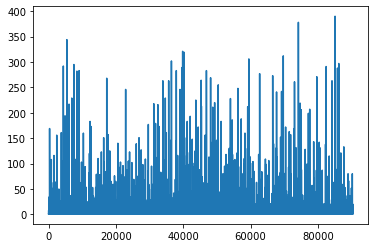

In [202]:
plt.plot(df['visitNumber'])

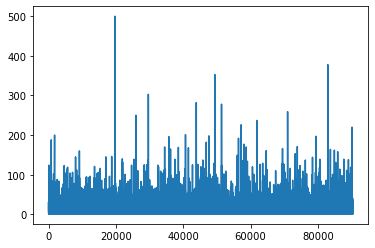

In [203]:
plt.plot(df['totals.hits'])

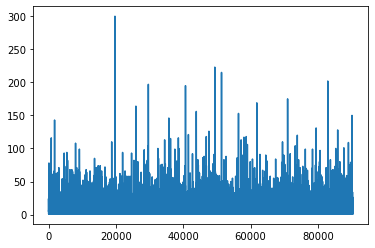

In [204]:
plt.plot(df['totals.pageviews'])

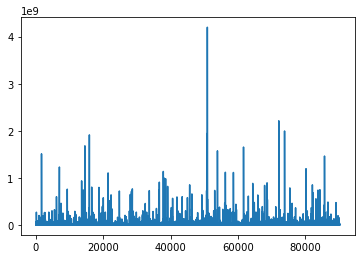

In [205]:
plt.plot(df['totals.transactionRevenue'])

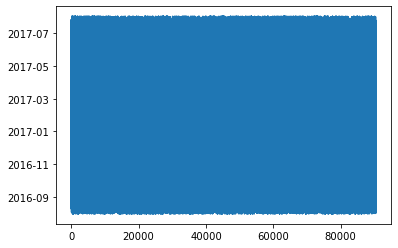

In [206]:
plt.plot(df['date'])

In [207]:
min(df['date'])

Timestamp('2016-08-01 00:00:00')

## Нормализация данных - log(x+1)
### Для использования параметров в дальнейшем необходимо, чтобы они были одного знака
#### В комментариях - другой способ нормализации, который пришлось убрать, чтобы корректно использовать эти параметры

In [208]:
df['visitNumber'] = np.log(df['visitNumber']+1)
#(df['visitNumber'] - df['visitNumber'].mean()) / df['visitNumber'].std()

In [209]:
min(df['visitNumber'])

0.6931471805599453

In [210]:
#df['totals.hits'] = (df['totals.hits'] - df['totals.hits'].mean()) / df['totals.hits'].std()
df['totals.hits'] =np.log(df['totals.hits']+1)

In [211]:
min(df['totals.hits'])

0.6931471805599453

In [212]:
#df['totals.pageviews'] = (df['totals.pageviews'] - df['totals.pageviews'].mean()) / df['totals.pageviews'].std()
df['totals.pageviews'] = np.log(df['totals.pageviews']+1)

In [213]:
#tst = (df['geoNetwork.continent'] - df['geoNetwork.continent'].mean()) / df['geoNetwork.continent'].std()
df['geoNetwork.continent'] = np.log(df['geoNetwork.continent']+1)

In [214]:
df.describe()

,channelGrouping,visitNumber,device.deviceCategory,geoNetwork.continent,totals.hits,totals.pageviews,totals.transactionRevenue
count,90365.000000,90365.000000,90365.000000,90365.000000,90365.000000,90365.000000,9.036500e+04
mean,0.001694,0.885471,0.497781,0.001194,1.264874,1.215270,1.602294e+06
std,0.003193,0.485331,0.844572,0.002251,0.787146,0.714495,3.186445e+07
min,0.000000,0.693147,0.000000,0.000000,0.693147,0.693147,0.000000e+00
25%,0.000639,0.693147,0.000000,0.000571,0.693147,0.693147,0.000000e+00
50%,0.000864,0.693147,0.000000,0.000936,1.098612,0.693147,0.000000e+00
75%,0.001720,0.693147,1.000000,0.001075,1.609438,1.609438,0.000000e+00
max,0.032294,5.968708,2.000000,0.014086,6.216606,5.707110,4.198500e+09


## Группировка по посетителям

In [215]:
df_clients = df.groupby(df['fullVisitorId'])

In [216]:
df_clients.first()

,channelGrouping,date,visitNumber,device.deviceCategory,geoNetwork.continent,totals.hits,totals.pageviews,totals.newVisits,totals.bounces,totals.transactionRevenue,...,browser.Firefox,browser.IE,browser.Edge,browser.Other,OS.Windows,OS.Mac,OS.Android,OS.IOS,OS.Linux,OS.Other
fullVisitorId,,,,,,,,,,,,,,,,,,,,,
0000114156543135683,0.000864,2016-08-08,0.693147,0,0.000936,0.693147,0.693147,True,True,0.0,...,False,False,False,False,False,True,False,False,False,False
0000176652019531658,0.000864,2017-01-16,0.693147,0,0.000936,0.693147,0.693147,True,True,0.0,...,False,False,False,False,False,False,False,False,True,False
000047810105303746,0.001720,2016-10-19,0.693147,0,0.001075,0.693147,0.693147,True,True,0.0,...,False,True,False,False,True,False,False,False,False,False
0000496879625382660,0.000864,2017-02-20,0.693147,0,0.000936,0.693147,0.693147,True,True,0.0,...,False,False,False,False,True,False,False,False,False,False
0000596526477588172,0.000639,2017-02-09,0.693147,0,0.000571,0.693147,0.693147,True,True,0.0,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999961560906226745,0.001720,2016-08-03,0.693147,2,0.000571,1.098612,1.098612,True,False,0.0,...,False,False,False,False,False,False,True,False,False,False
9999632697226950818,0.001720,2016-12-12,0.693147,0,0.001075,0.693147,0.693147,True,True,0.0,...,True,False,False,False,True,False,False,False,False,False
9999691889975139507,0.000864,2016-08-25,0.693147,0,0.000936,1.098612,0.693147,True,True,0.0,...,True,False,False,False,True,False,False,False,False,False


## Определение параметров для обучения

### hits max - максимальное количество обращений (присутствует явно)

In [217]:
hits_max = df_clients.apply(
    lambda x: max(x['totals.hits']))

In [218]:
statistics.mean(hits_max)

1.2696851467254167

### bounce_existence (присутствует явно) - существование отказов - наличие хотя бы одного отказа

In [219]:
bounce_existence = df_clients.apply(
    lambda x: max(x['totals.bounces']))

In [220]:
statistics.mean(bounce_existence)

0.5128979591836734

### pageViews_max (присутствует явно) - максимальное количество просмотров страниц

In [221]:
pageViews_max = df_clients.apply(
    lambda x: max(x['totals.pageviews']))

In [222]:
pageViews_max

fullVisitorId
0000114156543135683    0.693147
0000176652019531658    0.693147
000047810105303746     0.693147
0000496879625382660    0.693147
0000596526477588172    0.693147
                         ...   
999961560906226745     1.098612
9999632697226950818    0.693147
9999691889975139507    0.693147
9999799804624735268    1.791759
9999801229043043045    3.178054
Length: 85750, dtype: float64

### device_mode (присутствует явно) - категория устройства

In [223]:
#max(set(lst), key=lst.count)
device_mode = df_clients.apply(
    lambda x: statistics.mode(x['device.deviceCategory']))

In [224]:
device_mode

fullVisitorId
0000114156543135683    0
0000176652019531658    0
000047810105303746     0
0000496879625382660    0
0000596526477588172    0
                      ..
999961560906226745     2
9999632697226950818    0
9999691889975139507    0
9999799804624735268    0
9999801229043043045    0
Length: 85750, dtype: int64

### newVisits_min (присутствует явно) - первый раз ли посещает

In [225]:
newVisits_min = df_clients.apply(
    lambda x: min(x['totals.newVisits']))

In [226]:
newVisits_min

fullVisitorId
0000114156543135683    True
0000176652019531658    True
000047810105303746     True
0000496879625382660    True
0000596526477588172    True
                       ... 
999961560906226745     True
9999632697226950818    True
9999691889975139507    True
9999799804624735268    True
9999801229043043045    True
Length: 85750, dtype: bool

### visitNumber_max (присутствует явно) - номер посещения

In [227]:
visitNumber_max = df_clients.apply(
    lambda x: max(x['visitNumber']))

In [228]:
statistics.mean(visitNumber_max)

0.8430740383792694

### channelGrouping_median (Неявное - преобразование было раньше) - классификация трафика - группа канала, представляющая долю вхождения транзакций в этом регионе на каждую из групп

In [229]:
channelGrouping_median = df_clients.apply(
    lambda x: statistics.median(x['channelGrouping']))

In [230]:
channelGrouping_median

fullVisitorId
0000114156543135683    0.000864
0000176652019531658    0.000864
000047810105303746     0.001720
0000496879625382660    0.000864
0000596526477588172    0.000639
                         ...   
999961560906226745     0.001720
9999632697226950818    0.001720
9999691889975139507    0.000864
9999799804624735268    0.000639
9999801229043043045    0.001720
Length: 85750, dtype: float64

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90365 entries, 0 to 90364
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   channelGrouping                               90365 non-null  float64       
 1   date                                          90365 non-null  datetime64[ns]
 2   fullVisitorId                                 90365 non-null  object        
 3   visitNumber                                   90365 non-null  float64       
 4   device.deviceCategory                         90365 non-null  int64         
 5   geoNetwork.continent                          90365 non-null  float64       
 6   totals.hits                                   90365 non-null  float64       
 7   totals.pageviews                              90365 non-null  float64       
 8   totals.newVisits                              90365 non-null  bool

### operationSystemsMean (sum / count) [Неявное] - использованные операционки пользователем
### Предполагается, что если пользователь заходит с разных операционок, то интерес к магазину выше, а, значит, вероятность транзакций больше

In [232]:
operationSystems_mean = df_clients.apply(
    lambda x: ((max(x['OS.Windows']))+(max(x['OS.Mac']))+(max(x['OS.IOS']))+(max(x['OS.Linux']))+
        (max(x['OS.Android'])) + (max(x['OS.Other']))) / 6)

In [233]:
max(operationSystems_mean)#statistics.

0.3333333333333333

In [234]:
count = 0
for i in range(len(operationSystems_mean)):
    if operationSystems_mean[i] > 0.17:
        count += 1
print(count)

9


In [235]:
min(operationSystems_mean)

0.16666666666666666

### continents (Неявное - преобразование было раньше) - вероятность региона в осуществлении транзакции

In [236]:
continents = df_clients.apply(
    lambda x: statistics.median(x['geoNetwork.continent']))

In [237]:
continents

fullVisitorId
0000114156543135683    0.000936
0000176652019531658    0.000936
000047810105303746     0.001075
0000496879625382660    0.000936
0000596526477588172    0.000571
                         ...   
999961560906226745     0.000571
9999632697226950818    0.001075
9999691889975139507    0.000936
9999799804624735268    0.000936
9999801229043043045    0.000571
Length: 85750, dtype: float64

### hitsPerPage (Неявное) - среднее количество обращений за страницу

In [238]:
hitsPerPage = df_clients.apply(
    lambda x: sum(x['totals.hits']) / sum(x['totals.pageviews']))

In [239]:
min(hitsPerPage)

1.0

### Client Log(Frequency) (отсутствует явно) - частота посещения в месяц

In [240]:
frequency = df_clients.apply(
    lambda x: math.log(len(x["date"]) / ((max(x['date']) - min(x["date"])) / np.timedelta64(1, 'M'))+1) if (
            ((max(x['date']) - min(x["date"]))/np.timedelta64(1, 'M') > 0)) else 0)

In [241]:
max(frequency)

4.81012939986845

### Hits per month (Неявное) - количество обращений в месяц

In [242]:
hitsPerMonth = df_clients.apply(
    lambda x: math.log(sum(x['totals.hits']) / ((max(x['date']) - min(x["date"])) / np.timedelta64(1, 'M'))+1) if (
            ((max(x['date']) - min(x["date"]))/np.timedelta64(1, 'M') > 0)) else 0)

### weekdayMode (Неявное) - наиболее встречающийся день недели для пользователя, в который он заходил в магазин

In [243]:
weekdayMode = df_clients.apply(
    lambda x: statistics.mode(x['date'].dt.dayofweek))

In [244]:
weekdayMode

fullVisitorId
0000114156543135683    0
0000176652019531658    0
000047810105303746     2
0000496879625382660    0
0000596526477588172    3
                      ..
999961560906226745     2
9999632697226950818    0
9999691889975139507    3
9999799804624735268    6
9999801229043043045    0
Length: 85750, dtype: int64

### Y - log(sum(transaction))

In [245]:
df_Y = df_clients.apply(
    lambda x: math.log(sum(x['totals.transactionRevenue'])+1))

In [246]:
try_dataframe = pd.DataFrame(
    data={'Y': df_Y, 'HitsMax': hits_max, 'BounceExistence': bounce_existence, 
          'PageViewsMax': pageViews_max, 'DeviceMode': device_mode, 'NewVisitsMin': newVisits_min,
         'VisitNumberMax': visitNumber_max, 'ChannelGroupingMedian': channelGrouping_median,
         'OS_mean': operationSystems_mean, 'Continents': continents, 'HitsPerPage':hitsPerPage,
         'Frequency': frequency, 'HitsPerMonth': hitsPerMonth, 'WeekdayMode': weekdayMode})

In [247]:
try_dataframe.to_csv(r'ReadyForLearning.csv')

# Обучение моделей

## Получение X и Y из таблицы

In [2]:
df_input = pd.read_csv('ReadyForLearning.csv', dtype={'fullVisitorId': 'str'})

In [3]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85825 entries, 0 to 85824
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fullVisitorId          85825 non-null  object 
 1   Y                      85825 non-null  float64
 2   HitsMax                85825 non-null  float64
 3   BounceExistence        85825 non-null  bool   
 4   PageViewsMax           85825 non-null  float64
 5   DeviceMode             85825 non-null  int64  
 6   NewVisitsMin           85825 non-null  bool   
 7   VisitNumberMax         85825 non-null  float64
 8   ChannelGroupingMedian  85825 non-null  float64
 9   OS_mean                85825 non-null  float64
 10  Continents             85825 non-null  float64
 11  HitsPerPage            85825 non-null  float64
 12  Frequency              85825 non-null  float64
 13  HitsPerMonth           85825 non-null  float64
 14  WeekdayMode            85825 non-null  int64  
dtypes:

In [4]:
df_input = df_input.set_index('fullVisitorId')

In [5]:
Y_table = df_input.Y

In [6]:
Y_table

fullVisitorId
0000010278554503158    0.0
0000174067426171406    0.0
0000436683523507380    0.0
0000568867259253661    0.0
0000639845445148063    0.0
                      ... 
9999636803769846518    0.0
9999773079368714197    0.0
9999887420016307570    0.0
9999963186378918199    0.0
999997550040396460     0.0
Name: Y, Length: 85825, dtype: float64

In [7]:
df_input.drop('Y', 1, inplace=True)

In [8]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85825 entries, 0000010278554503158 to 999997550040396460
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HitsMax                85825 non-null  float64
 1   BounceExistence        85825 non-null  bool   
 2   PageViewsMax           85825 non-null  float64
 3   DeviceMode             85825 non-null  int64  
 4   NewVisitsMin           85825 non-null  bool   
 5   VisitNumberMax         85825 non-null  float64
 6   ChannelGroupingMedian  85825 non-null  float64
 7   OS_mean                85825 non-null  float64
 8   Continents             85825 non-null  float64
 9   HitsPerPage            85825 non-null  float64
 10  Frequency              85825 non-null  float64
 11  HitsPerMonth           85825 non-null  float64
 12  WeekdayMode            85825 non-null  int64  
dtypes: bool(2), float64(9), int64(2)
memory usage: 10.5+ MB


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    df_input, Y_table, test_size=0.2, random_state=26)

### Обучение GBM

#### Проверка влияния Impurity - оказалась крайне незначительной

In [660]:
def CheckImpurity(X_train, X_test, y_train, y_test):
    min_impurity_parameter_values = [0.01, 0.11, 0.12, 0.13, 0.14, 0.145, 0.015, 0.155, 0.16, 0.165, 0.17, 0.02]
    for min_impurity_decrease_parameter in min_impurity_parameter_values:
        GBM = ensemble.GradientBoostingRegressor(n_estimators=210, min_samples_leaf=15, max_depth=5,
                                            max_features='sqrt', subsample=0.85, min_samples_split=300, random_state=14,
                                                min_impurity_decrease=min_impurity_decrease_parameter)
        GBM.fit(X_train, y_train)
        print(str(min_impurity_decrease_parameter)+" : "+str(GBM.score(X_test, y_test)))

In [661]:
CheckImpurity(X_train, X_test, y_train, y_test)

0.01 : 0.3196772289545958
0.11 : 0.31745538149772357
0.12 : 0.3156371577179996
0.13 : 0.31400467116938924
0.14 : 0.31527571596522963
0.145 : 0.31527571596522963
0.015 : 0.3210923239483021
0.155 : 0.3139408080181534
0.16 : 0.3139408080181534
0.165 : 0.3139408080181534
0.17 : 0.3139408080181534
0.02 : 0.3175282329765522


### Обучение и получение score за одну попытку:
#### Параметры подбирались вручную исходя из вычислительных возможностей и рекомендаций к обучению GBM:
#### https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [36]:
GBM = ensemble.GradientBoostingRegressor(n_estimators=210, min_samples_leaf=15, max_depth=5,
                                        max_features='sqrt', subsample=0.85, min_samples_split=300 #random_state=14
                                        )

In [37]:
GBM.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=300,
                          min_weight_fraction_leaf=0.0, n_estimators=210,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.85, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
GBM.score(X_test, y_test)

0.3126097150376006

### Обучение RandomForest

#### Поиск параметров через RandomizedSearchCV

In [17]:
from sklearn.model_selection import RandomizedSearchCV
# count of trees in random forest
n_estimators = [100, 150, 200, 400, 600, 800, 1000, 1200, 1400, 1600]#, 1000, 1200, 1400, 1600, 1800, 2000
# count of features for splitting
max_features = ['auto', 'sqrt', 'log2']
# max number of levels in tree
max_depth = [3, 5, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, None]#, 40, 50, 60, 70, 80, 90, 100
# min of samples for splitting
min_samples_split = [2, 5, 10, 15, 20, 25, 40, 60, 80, 150, 200, 250, 300, 350]
# min of samples for a leaf
min_samples_leaf = [1, 2, 3, 5, 7, 10, 15, 20, 25, 40, 50, 60, 100]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Loss criteria
#criterion = ['mse', 'mae']
# columns
#max_features = ['auto', 'sqrt', 'log2']

parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}#, 'criterion': criterion, 'max_features': max_features

rf = ensemble.RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = parameters, 
                               n_iter = 40, cv = 2, verbose=2, random_state=30)
rf_random.fit(X_train, y_train)

print(rf_random.best_params_)

Fitting 2 folds for each of 40 candidates, totalling 80 fits
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=40, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=40, bootstrap=True, total=   8.6s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=40, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.5s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=40, bootstrap=True, total=   8.8s
[CV] n_estimators=600, min_samples_split=200, min_samples_leaf=5, max_features=auto, max_depth=9, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=200, min_samples_leaf=5, max_features=auto, max_depth=9, bootstrap=False, total=  19.9s
[CV] n_estimators=600, min_samples_split=200, min_samples_leaf=5, max_features=auto, max_depth=9, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=200, min_samples_leaf=5, max_features=auto, max_depth=9, bootstrap=False, total=  23.1s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=40, bootstrap=True, total=   1.3s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=1

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 18.6min finished


{'n_estimators': 1000, 'min_samples_split': 60, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}


#### Проверка работы на одной попытке

In [21]:
RandomForest = ensemble.RandomForestRegressor(n_estimators=1000, min_samples_split=60,
                                              max_depth=30, max_features="sqrt",random_state=30,
                                             min_samples_leaf=3, bootstrap=True)

In [22]:
RandomForest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=60, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=30, verbose=0, warm_start=False)

In [23]:
RandomForest.score(X_test, y_test)

0.31047899786398414

### Обучение линейной регрессии
#### В sklearn отсутствует возможность задачи гиперпараметров кроме нормализации

In [30]:
LinRegression = LinearRegression(normalize=False)

In [31]:
LinRegression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
LinRegression.score(X_test, y_test)

0.1333814218852556

### Обучение SVR

In [76]:
svr = SVR(C=12.0, epsilon=0.2, kernel="poly", max_iter=50000)

In [77]:
svr.fit(X_train, y_train) 

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVR(C=12.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='poly', max_iter=50000, shrinking=True, tol=0.001, verbose=False)

In [78]:
svr.score(X_test, y_test)

0.009756357873817234

In [79]:
l_svr = LinearSVR(C=1000, epsilon=0.2, max_iter=10000)
l_svr.fit(X_train, y_train)

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR(C=1000, dual=True, epsilon=0.2, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0)

In [80]:
l_svr.score(X_test, y_test)

0.015070312525564011

### Вычисление медианы

In [81]:
crossval = ShuffleSplit(n_splits=5, test_size=0.2, random_state=13)
GBM_score = statistics.median(cross_val_score(GBM,  df_input, Y_table, cv=crossval))

In [82]:
RF_score = statistics.median(cross_val_score(RandomForest, df_input, Y_table, cv=crossval))

In [83]:
LR_score = statistics.median(cross_val_score(LinRegression, df_input, Y_table, cv=crossval))

In [84]:
l_svr_score = statistics.median(cross_val_score(l_svr,  df_input, Y_table, cv=crossval))

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWa

In [85]:
svr_score = statistics.median(cross_val_score(svr,  df_input, Y_table, cv=crossval))

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:228: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your dat

In [87]:
print("GBM_avg : " + str(GBM_score))
print("RF_avg : " + str(RF_score))
print("LR_avg : " + str(LR_score))
print("l_svr_avg : " + str(l_svr_score))
print("svr_avg : " + str(svr_score))

GBM_avg : 0.3123986799332046
RF_avg : 0.31717568862830103
LR_avg : 0.14483544081299093
l_svr_avg : 0.018001388557613685
svr_avg : 0.004720742560960223


## Выполнение 20 разбиений и построение boxPlot

### Построение для GBM

In [89]:
crossval_next = ShuffleSplit(n_splits=20, test_size=0.2, random_state=13)
GBM_results = cross_val_score(GBM,  df_input, Y_table, cv=crossval_next)

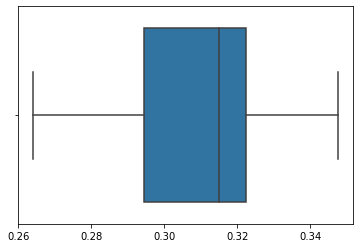

In [92]:
gbm_boxplot = sns.boxplot(x=GBM_results)

In [257]:
statistics.variance(GBM_results)

0.00045015187450632205

### Построение для Random Forest

In [93]:
RF_results = cross_val_score(RandomForest, df_input, Y_table, cv=crossval_next)

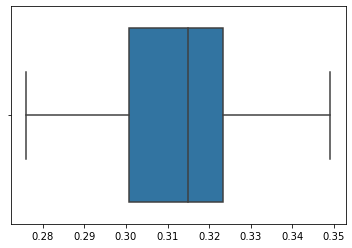

In [94]:
rf_boxplot = sns.boxplot(x=RF_results)

In [256]:
statistics.variance(RF_results)

0.00034101030551845915

### Построение для Linear Regression

In [95]:
LR_results = cross_val_score(LinRegression, df_input, Y_table, cv=crossval_next)

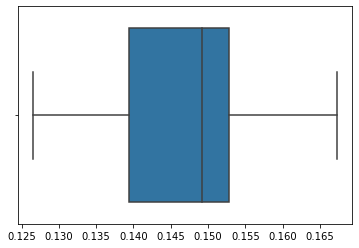

In [96]:
lr_boxplot = sns.boxplot(x=LR_results)

In [255]:
statistics.variance(LR_results)

0.00010547431975198871

### Построение для Linear SVR

In [249]:
SVR_results = cross_val_score(l_svr, df_input, Y_table, cv=crossval_next)

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWa

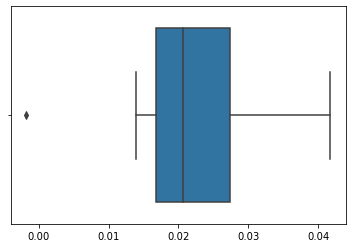

In [250]:
svr_boxplot = sns.boxplot(x=SVR_results)

In [254]:
statistics.variance(SVR_results)

7.622246836742066e-05

### Построение для SVR (kernel = 'rbf')

In [258]:
svr = SVR(C=1000, epsilon=0.2)

In [259]:
SVR_ordinary_results = cross_val_score(svr, df_input, Y_table, cv=crossval_next)

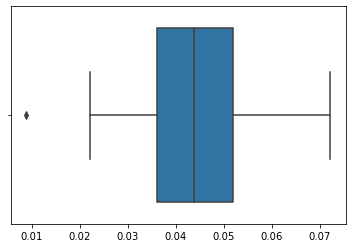

In [260]:
svr_boxplot = sns.boxplot(x=SVR_ordinary_results)